## Binary Classification of Insurance Cross Selling

The goal of this competition is to predict customers who will respond positively to a car insurance offer. This type of binary classification problem provides an excellent opportunity to develop your machine learning skills. The project includes reading, processing, visualizing, and modeling data.

<a href='https://www.kaggle.com/competitions/playground-series-s4e7' target=_blank>You can find the data file here</a>

![](https://riskcovry.com/wp-content/uploads/2022/04/d.jpg)

<a href='https://www.kaggle.com/competitions/playground-series-s4e7' target=_blank>You can find the competition here</a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e7/sample_submission.csv
/kaggle/input/playground-series-s4e7/train.csv
/kaggle/input/playground-series-s4e7/test.csv


## Import Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s4e7/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e7/test.csv')
#Reading the file.

## EDA

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,Male,21,1,35.0,0,1-2 Year,Yes,65101.0,124.0,187,0
1,1,Male,43,1,28.0,0,> 2 Years,Yes,58911.0,26.0,288,1
2,2,Female,25,1,14.0,1,< 1 Year,No,38043.0,152.0,254,0
3,3,Female,35,1,1.0,0,1-2 Year,Yes,2630.0,156.0,76,0
4,4,Female,36,1,15.0,1,1-2 Year,No,31951.0,152.0,294,0


In [5]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,11504798,Female,20,1,47.0,0,< 1 Year,No,2630.0,160.0,228
1,11504799,Male,47,1,28.0,0,1-2 Year,Yes,37483.0,124.0,123
2,11504800,Male,47,1,43.0,0,1-2 Year,Yes,2630.0,26.0,271
3,11504801,Female,22,1,47.0,1,< 1 Year,No,24502.0,152.0,115
4,11504802,Male,51,1,19.0,0,1-2 Year,No,34115.0,124.0,148


In [6]:
train.shape, test.shape

((11504798, 12), (7669866, 11))

In [7]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [9]:
df=pd.concat([train,test])
#Merging the files.

In [10]:
train.drop('id', axis=1 ,inplace=True)

In [11]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,1.917466e+07,1.917466e+07,1.917466e+07,1.917466e+07,1.917466e+07,1.917466e+07,1.917466e+07,1.917466e+07,1.150480e+07
mean,9.587332e+06,3.838669e+01,9.980215e-01,2.642186e+01,4.630288e-01,3.046303e+04,1.124013e+02,1.638985e+02,1.229973e-01
std,5.535249e+06,1.499588e+01,4.443627e-02,1.299268e+01,4.986313e-01,1.645119e+04,5.405087e+01,7.998150e+01,3.284341e-01
min,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.630000e+03,1.000000e+00,1.000000e+01,0.000000e+00
25%,4.793666e+06,2.400000e+01,1.000000e+00,1.500000e+01,0.000000e+00,2.527900e+04,2.900000e+01,9.900000e+01,0.000000e+00
50%,9.587332e+06,3.600000e+01,1.000000e+00,2.800000e+01,0.000000e+00,3.182400e+04,1.510000e+02,1.660000e+02,0.000000e+00
75%,1.438100e+07,4.900000e+01,1.000000e+00,3.500000e+01,1.000000e+00,3.945400e+04,1.520000e+02,2.320000e+02,0.000000e+00
max,1.917466e+07,8.500000e+01,1.000000e+00,5.200000e+01,1.000000e+00,5.401650e+05,1.630000e+02,2.990000e+02,1.000000e+00


In [12]:
df.corr(numeric_only=True)

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.000159,0.000006,0.000402,0.000198,0.000074,-0.000217,-0.000050,0.000018
Age,0.000159,1.000000,-0.078358,0.037462,-0.276452,0.056462,-0.591589,-0.013346,0.122134
Driving_License,0.000006,-0.078358,1.000000,-0.001515,0.013687,-0.007184,0.042783,-0.000555,0.009197
Region_Code,0.000402,0.037462,-0.001515,1.000000,-0.022227,-0.001949,-0.037757,-0.005325,0.012816
Previously_Insured,0.000198,-0.276452,0.013687,-0.022227,1.000000,0.007741,0.236874,0.019692,-0.345930
Annual_Premium,0.000074,0.056462,-0.007184,-0.001949,0.007741,1.000000,-0.128589,0.003235,0.032261
Policy_Sales_Channel,-0.000217,-0.591589,0.042783,-0.037757,0.236874,-0.128589,1.000000,0.009048,-0.152733
Vintage,-0.000050,-0.013346,-0.000555,-0.005325,0.019692,0.003235,0.009048,1.000000,-0.015177
Response,0.000018,0.122134,0.009197,0.012816,-0.345930,0.032261,-0.152733,-0.015177,1.000000


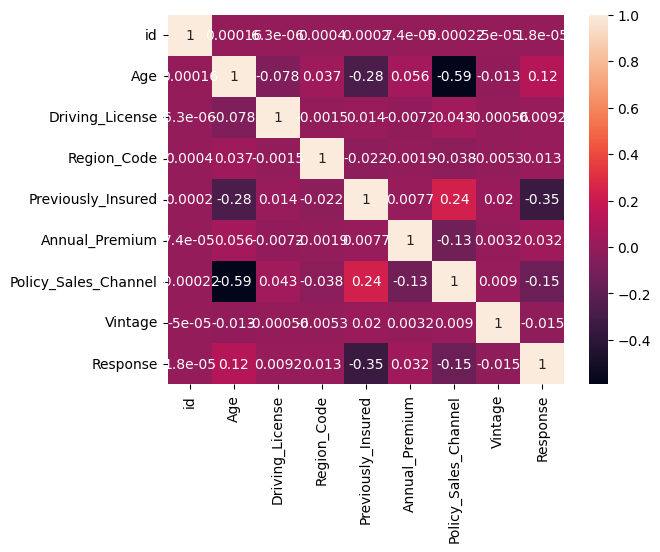

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True);

## Data Visualization

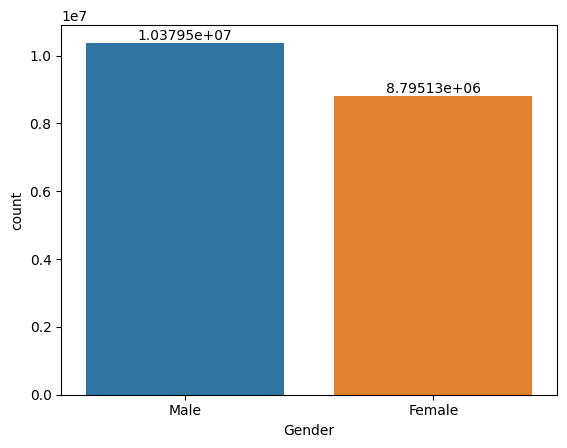

In [14]:
ax=sns.countplot(x=df['Gender'])
ax.bar_label(ax.containers[0]);

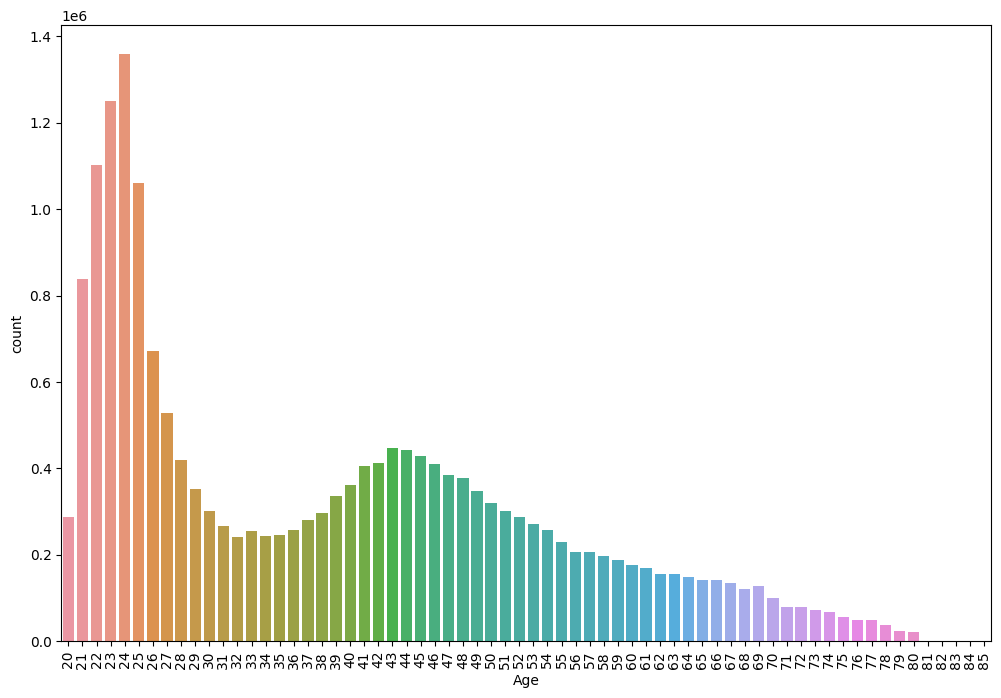

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['Age'])
plt.xticks(rotation=90);

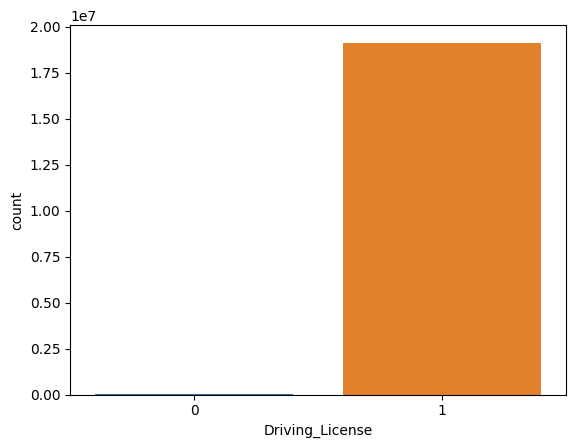

In [16]:
sns.countplot(x=df['Driving_License']);

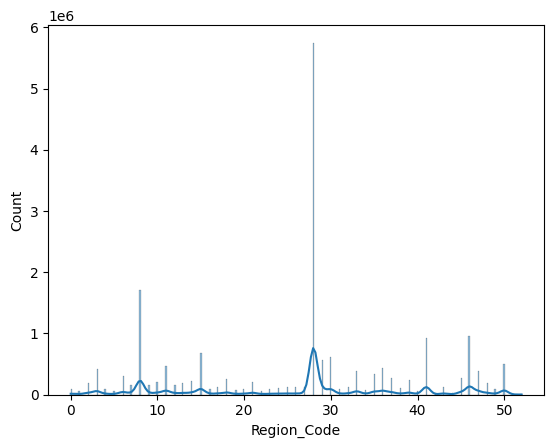

In [17]:
sns.histplot(x=df['Region_Code'], kde=True);

In [18]:
#df['Vehicle_Age']=df['Vehicle_Age'].str.replace("[^\w\s]" , "",regex=True)

In [19]:
df['Vehicle_Age']=df['Vehicle_Age'].str.replace('1-2 Year','One to Two Years')
df['Vehicle_Age']=df['Vehicle_Age'].str.replace('> 2 Years','More than Two Years')
df['Vehicle_Age']=df['Vehicle_Age'].str.replace('< 1 Year', 'Less than One Year ')


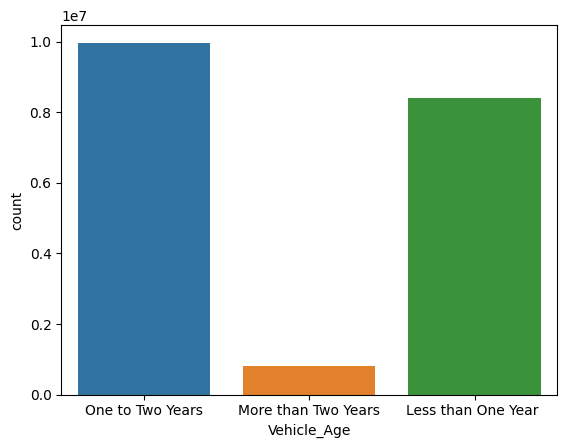

In [20]:
sns.countplot(x=df['Vehicle_Age']);

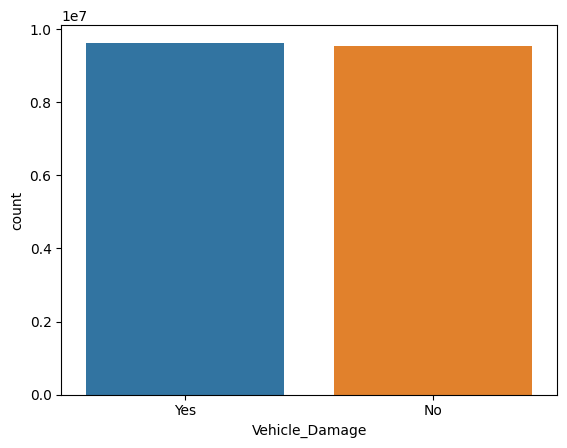

In [21]:
sns.countplot(x=df['Vehicle_Damage']);

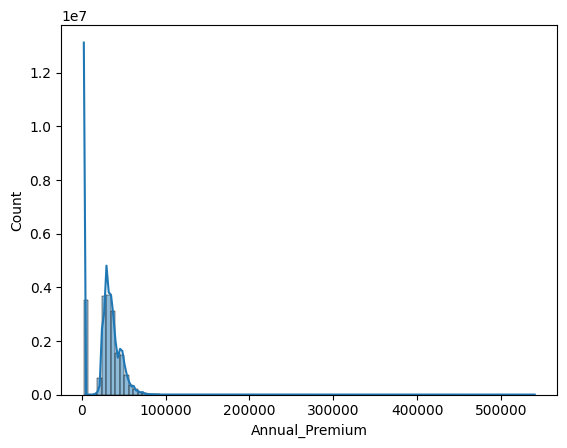

In [22]:
sns.histplot(x=df['Annual_Premium'], kde=True, bins=100);

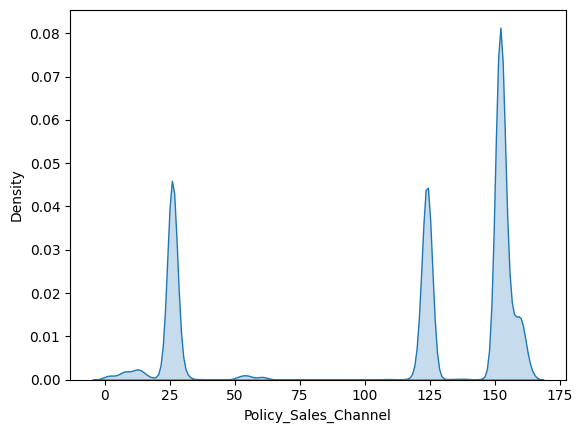

In [23]:
sns.kdeplot(x=df['Policy_Sales_Channel'], fill=True);

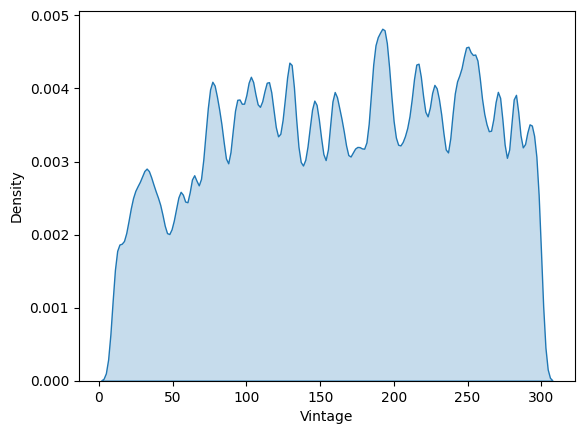

In [24]:
sns.kdeplot(x=df['Vintage'], fill=True);

In [25]:
df['Response'].value_counts()

Response
0.0    10089739
1.0     1415059
Name: count, dtype: int64

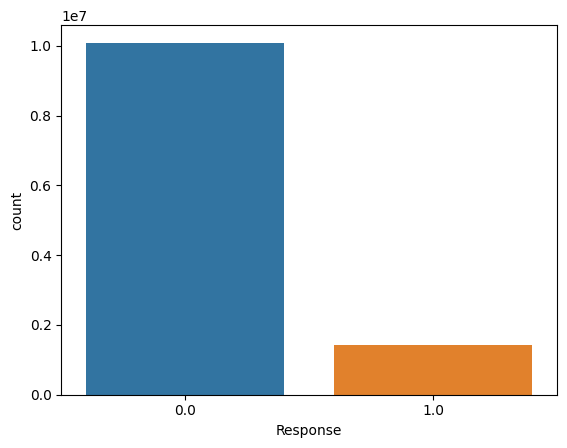

In [26]:
sns.countplot(x=df['Response']);

## Modelling

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [28]:
train.shape

(11504798, 11)

In [29]:
df=pd.get_dummies(df)

In [30]:
df.shape

(19174664, 16)

In [31]:
df.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_Less than One Year,Vehicle_Age_More than Two Years,Vehicle_Age_One to Two Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0,21,1,35.0,0,65101.0,124.0,187,0.0,False,True,False,False,True,False,True
1,1,43,1,28.0,0,58911.0,26.0,288,1.0,False,True,False,True,False,False,True
2,2,25,1,14.0,1,38043.0,152.0,254,0.0,True,False,True,False,False,True,False
3,3,35,1,1.0,0,2630.0,156.0,76,0.0,True,False,False,False,True,False,True
4,4,36,1,15.0,1,31951.0,152.0,294,0.0,True,False,False,False,True,True,False


In [32]:
train=df[:11504798]
test=df[11504798:]

In [33]:
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_Less than One Year,Vehicle_Age_More than Two Years,Vehicle_Age_One to Two Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0,21,1,35.0,0,65101.0,124.0,187,0.0,False,True,False,False,True,False,True
1,1,43,1,28.0,0,58911.0,26.0,288,1.0,False,True,False,True,False,False,True
2,2,25,1,14.0,1,38043.0,152.0,254,0.0,True,False,True,False,False,True,False
3,3,35,1,1.0,0,2630.0,156.0,76,0.0,True,False,False,False,True,False,True
4,4,36,1,15.0,1,31951.0,152.0,294,0.0,True,False,False,False,True,True,False


In [34]:
x=train.drop('Response', axis=1)
y=train[['Response']]

In [35]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.20, random_state=42)

In [36]:
g=GaussianNB()
g.fit(x_train,y_train)
gtahmin=g.predict(x_test)
accuracy_score(gtahmin,y_test)

0.8768327133022739

In [37]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

         0.0       1.00      0.88      0.93   2300579
         1.0       0.00      0.21      0.00       381

    accuracy                           0.88   2300960
   macro avg       0.50      0.54      0.47   2300960
weighted avg       1.00      0.88      0.93   2300960



In [38]:
confusion_matrix(gtahmin,y_test)

array([[2017476,  283103],
       [    300,      81]])

<Axes: >

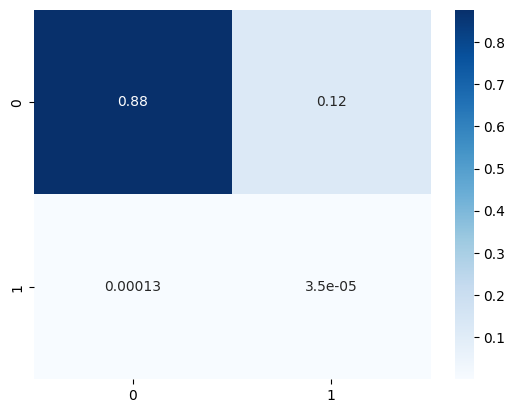

In [39]:
cm = confusion_matrix(gtahmin, y_test)
normalized_cm = cm / cm.sum()
sns.heatmap(normalized_cm, annot=True, cmap='Blues')

In [40]:
#Auc and Roc
y_scores = g.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

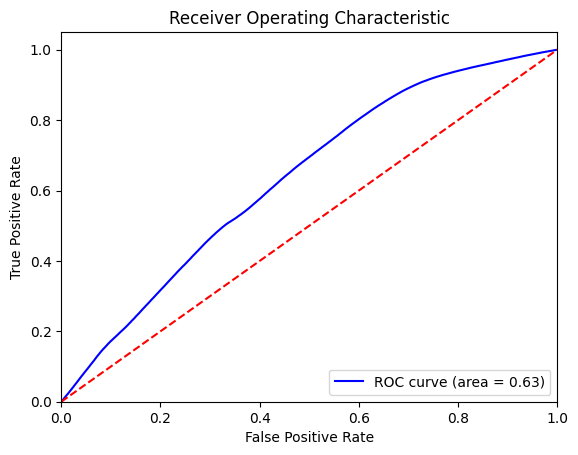

In [41]:
plt.figure()
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Test Data Prediction

In [42]:
df=pd.get_dummies(df)

In [43]:
train=df[:11504798]
test=df[11504798:]

In [44]:
train.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_Less than One Year,Vehicle_Age_More than Two Years,Vehicle_Age_One to Two Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,0,21,1,35.0,0,65101.0,124.0,187,0.0,False,True,False,False,True,False,True
1,1,43,1,28.0,0,58911.0,26.0,288,1.0,False,True,False,True,False,False,True
2,2,25,1,14.0,1,38043.0,152.0,254,0.0,True,False,True,False,False,True,False
3,3,35,1,1.0,0,2630.0,156.0,76,0.0,True,False,False,False,True,False,True
4,4,36,1,15.0,1,31951.0,152.0,294,0.0,True,False,False,False,True,True,False


In [45]:
test.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Age_Less than One Year,Vehicle_Age_More than Two Years,Vehicle_Age_One to Two Years,Vehicle_Damage_No,Vehicle_Damage_Yes
0,11504798,20,1,47.0,0,2630.0,160.0,228,NaN,True,False,True,False,False,True,False
1,11504799,47,1,28.0,0,37483.0,124.0,123,NaN,False,True,False,False,True,False,True
2,11504800,47,1,43.0,0,2630.0,26.0,271,NaN,False,True,False,False,True,False,True
3,11504801,22,1,47.0,1,24502.0,152.0,115,NaN,True,False,True,False,False,True,False
4,11504802,51,1,19.0,0,34115.0,124.0,148,NaN,False,True,False,False,True,True,False


In [46]:
x=train.drop('Response', axis=1)
y=train[['Response']]

In [47]:
g=GaussianNB()
g.fit(x_train, y_train)
x_test=test.drop('Response', axis=1)

In [48]:
predictions=g.predict(x_test)

In [49]:
predictions1=pd.DataFrame()
predictions1['id']=test['id']
predictions1['Response']=predictions

In [50]:
predictions1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7669866 entries, 0 to 7669865
Data columns (total 2 columns):
 #   Column    Dtype  
---  ------    -----  
 0   id        int64  
 1   Response  float64
dtypes: float64(1), int64(1)
memory usage: 175.5 MB


In [51]:
predictions1.to_csv('insurance_submission.csv', index=False)

## Summary

After successfully reading the dataset, data separation, checking for missing values ​​and processing them appropriately were performed. Various visualizations were made to understand the distributions and interactions of the features within the dataset. This stage is critical to better understand the structure of the data and to determine the features that will increase the performance of the model. After the dataset was divided into two as training and testing, various machine learning models were trained. During the model training, optimization studies were carried out to obtain the best results by making hyperparameter adjustments. The performance of the model was evaluated with metrics such as confusion matrix, AUC (Area Under the Curve) and ROC (Receiver Operating Characteristic) curve and classification report. These metrics were used to analyze the accuracy and classification ability of the model. Finally, the model was trained on the test data, predictions were made and the results were recorded. This project aims to develop a comprehensive machine learning process to predict customer responses in automobile insurance offers. A user-oriented and effective classification model was created with the data reading, visualization, model training and evaluation stages. In this way, the company's marketing strategies will be made more effective and customer satisfaction will be increased.